In [2]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from scipy import special

Using the code from the Serrodyne file, this will use an input of modulation frequencies and their respective modulation indices to output a frequency spectrum

In [67]:
W = [8000,6000,60]      #frequencies we modulate at
Indices = [1.411,1.6,1.253]   #modulation indices

Order = 4     #Considering up to this order

In [70]:
#work out the amplitude for each frequency:
values = range(-Order, Order + 1)  # from -Order to Order

Orders = []     #this will include all of the possible combinations from the modulation frequencies
NumberOfPlots = 0   #this is the number of sets of indices in Orders
for p in itertools.product(values, repeat = np.size(W)):        #intertools produces all possible combinations of elements
    NumberOfPlots += 1
    Orders.append(p)

#Use the same function as before to find the powers at different frequencies
def FreqAndAmp(Orders,ModIndices):

    Freq = 0
    for i in range(0, np.size(Orders)):
        Freq += int(Orders[i] * W[i])

    Amp = 1
    for x in range(np.size(ModIndices)):
        Amp *= special.jv(Orders[x], ModIndices[x])
    return(Freq,Amp)

#find the freqs and amps
UnorderedFrequencies , UnorderedAmps = [] , []
for i in range(0, NumberOfPlots):
    UnorderedFtemp, UnorderedAmptemp = FreqAndAmp(Orders[i],Indices)
    UnorderedFrequencies.append(UnorderedFtemp)
    UnorderedAmps.append(UnorderedAmptemp)

#but this is not finding the total amplitudes at each frequency, rather the amplitudes for each tone modulated at without summing them.

#make a list of all of the frequencies we should be plotting:
Frequencies = []
for item in UnorderedFrequencies:
    if item not in Frequencies:
        Frequencies.append(item)

#now find the powers for each of these frequencies
Powers = []
for f in range(0,np.size(Frequencies)):
    A = []
    for unf in range(0,np.size(UnorderedFrequencies)):
        if Frequencies[f] == UnorderedFrequencies[unf]:
            A.append(UnorderedAmps[unf])
    Powers.append(sum(A)**2)       #sum twice since this is a list of arrays

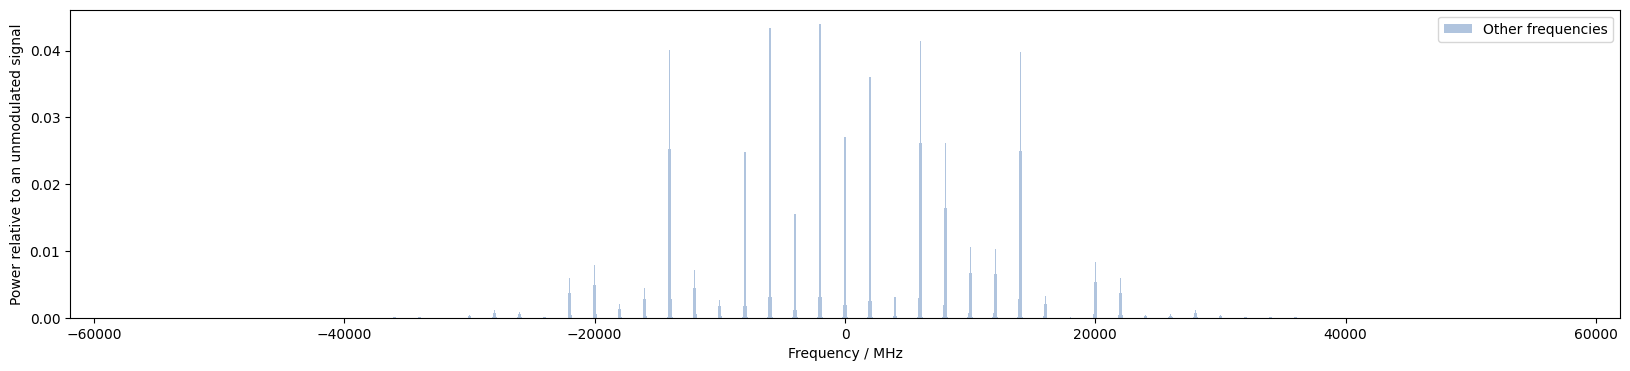

In [71]:
#plot the power spectrum
plt.figure(figsize=(20,4))
plt.bar(Frequencies, Powers,width=100, color='lightsteelblue', label = 'Other frequencies')

plt.legend()
plt.xlabel('Frequency / MHz')
plt.ylabel('Power relative to an unmodulated signal')
plt.title('')
plt.show()